### Read data

In [9]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

dataCondition1 = pd.read_csv('condition1.csv')  #Reading data where the arrow was the navigational aid
dataCondition1
dataCondition1["Condition"] = "Arrow"


In [10]:
dataCondition2 = pd.read_csv('condition2.csv')  #Reading data where NPC was the navigational aid
dataCondition2
dataCondition2["Condition"] = "NPC"

In [11]:
data = pd.concat([dataCondition1, dataCondition2]).reset_index(drop = True)
data.head(60)

,participant number,time going to forward,time going back,mistakes made,shortcuts taken,Condition
0,test,304.46,322.920000,1,0,Arrow
1,test,124.58,73.560000,0,3,NPC
2,test2,169.02,111.759995,2,4,NPC


### Looking at the data

12
22


,Q1,Q2,Q3,Q4,Q5,Q6,Condition,Score,Gender,Age
0,1,1,2,1,1,1,Control,1.166667,Female,31
1,2,4,6,5,1,3,Control,3.500000,Female,21
2,4,4,7,6,3,1,Control,4.166667,Female,23
3,6,6,4,6,3,2,Control,4.500000,Female,51
4,5,5,5,5,5,6,Control,5.166667,Male,46
5,2,1,1,1,1,1,Control,1.166667,Female,25
6,1,1,1,1,1,1,Control,1.000000,Female,23
7,3,1,2,1,1,1,Control,1.500000,Male,30
8,6,5,6,6,6,5,Control,5.666667,Male,21
9,3,1,1,2,5,1,Control,2.166667,Male,25


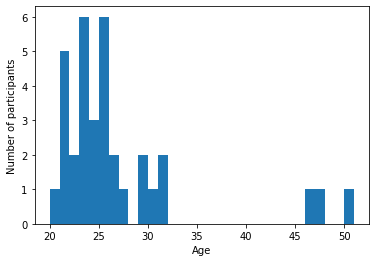

In [31]:
#Gender
controlMaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q1"]
controlFemaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q1"]
print(controlMaleQ1.count())  # count of males
print(controlFemaleQ1.count())# count of females

control = cleanDataControl[cleanDataControl['Condition'] == 'Control']
test = cleanDataControl[cleanDataControl['Condition'] == 'Test']


plt.hist(control["Age"], bins = 31)
plt.xlabel("Age")
plt.ylabel("Number of participants")

control

### Descriptive Statistics

In [26]:
control.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Score,Age
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,3.794118,3.117647,3.794118,3.705882,3.058824,2.882353,3.392157,26.529412
std,1.771481,1.821832,1.950593,2.008005,1.983892,1.754038,1.583736,7.398752
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.166667,23.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.416667,24.500000
75%,5.750000,4.750000,5.000000,6.000000,5.000000,4.000000,4.500000,26.750000
max,6.000000,6.000000,7.000000,7.000000,7.000000,6.000000,6.166667,51.000000


In [30]:
controlMean = control.Score.mean()
testMean = test.Score.mean()

controlStd = control.Score.std()
testStd = test.Score.std()
print(controlMean)
print(testMean)
print(controlStd)
print(testStd)

effectSize = stats.pearsonr(control.Score, test.Score)
print(effectSize)

3.392156862745098
3.3823529411764706
1.5837359152951984
1.5819528334563737
(0.9012436794161505, 3.6801556772716795e-13)


### Non-parametric statistics

The requirements for the Wilcoxon Signed Rank Sum Test (WSRST) - wilcoxon
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.wilcoxon.html


    The WSRST requires that the populations be paired, for example, the same group of people are tested on two different occasions or things and MEASURED on the effects of each and we then compare the two things or occasions.
    The WSRST requires the data to be quantitative. Quantitative data is data that is measured along a scale, that is why I highlighted the world measured in the first point. Had the participants been asked to rank their responses, you will then be dealing with qualitative data, where you will then have to use the sign test to test your hypothesis.

Now the Wilcoxon Rank Sum Test (WRST) - ranksums - same as mannwhitneyu
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ranksums.html

    The main requirement is that the samples be drawn from independent populations. For example you might want to test whether the exam paper 1 is harder than exam paper 2, and to do this you will have two groups of students, and the groups need not be the same size. From the example the two groups are independent, if you had asked the same group to write the same paper twice, then you will use the WSRST to test your hypothesis.
    The other requirement is that the data need not be quantitative, i.e. you can also perform the test on qualitative data.


Mann Whitney U Test is said to be the same as the Wilcoxon Rank Sum Test, but can be used to compare two separate groups.
https://www.youtube.com/watch?v=2L_QAgVXyhc
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html 


Wilcoxon test should be used if we have repeated measures. Mann u whitney should be used if we have independant measures. 

Independent is when a participant only does one condition. This means that we can only use Mann u whitney test for the first video the participants are shown. In other cases, we have participants doing both conditions, which means that Wilcoxon should be used. 

### Condition

Comparing every question based on condition 

In [4]:
controlQ1 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q1"]
testQ1 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q1"]
stats.wilcoxon(controlQ1, testQ1)

WilcoxonResult(statistic=67.5, pvalue=0.6583982655830843)

In [5]:
controlQ2 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q2"]
testQ2 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q2"]

stats.wilcoxon(controlQ2, testQ2)

WilcoxonResult(statistic=52.5, pvalue=0.22381070135969539)

In [6]:
controlQ3 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q3"]
testQ3 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q3"]

stats.wilcoxon(controlQ3, testQ3)

WilcoxonResult(statistic=56.5, pvalue=0.32767012747337343)

In [7]:
controlQ4 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q4"]
testQ4 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q4"]

stats.wilcoxon(controlQ4, testQ4)

WilcoxonResult(statistic=130.0, pvalue=0.5469714934840502)

In [8]:
controlQ5 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q5"]
testQ5 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q5"]

stats.wilcoxon(controlQ5, testQ5)

WilcoxonResult(statistic=41.0, pvalue=0.45624567675289407)

In [9]:
controlQ6 = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Q6"]
testQ6 = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Q6"]

stats.wilcoxon(controlQ6, testQ6)

WilcoxonResult(statistic=123.5, pvalue=0.9192699465699425)

### Gender

Let's check if gender makes a difference for any of the questions. As the number of respondents of each gender is not equal, Mann-Whitney U test will be used here. 


In [10]:
controlMaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q1"]
controlFemaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q1"]
stats.mannwhitneyu(controlMaleQ1, controlFemaleQ1)

MannwhitneyuResult(statistic=119.5, pvalue=0.3298763119075797)

In [11]:
testMaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q1"]
testFemaleQ1 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q1"]
stats.mannwhitneyu(testMaleQ1, testFemaleQ1)

MannwhitneyuResult(statistic=117.0, pvalue=0.29802506399763223)

In [12]:
controlMaleQ2 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q2"]
controlFemaleQ2 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q2"]
stats.mannwhitneyu(controlMaleQ2, controlFemaleQ2)

MannwhitneyuResult(statistic=112.0, pvalue=0.236650232649541)

In [13]:
testMaleQ2 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q2"]
testFemaleQ2 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q2"]
stats.mannwhitneyu(testMaleQ2, testFemaleQ2)

MannwhitneyuResult(statistic=124.5, pvalue=0.39891871808922563)

In [14]:
controlMaleQ3 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q3"]
controlFemaleQ3 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q3"]
stats.mannwhitneyu(controlMaleQ3, controlFemaleQ3)

MannwhitneyuResult(statistic=130.0, pvalue=0.47816508384643297)

In [15]:
testMaleQ3 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q3"]
testFemaleQ3 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q3"]
stats.mannwhitneyu(testMaleQ3, testFemaleQ3)

MannwhitneyuResult(statistic=115.5, pvalue=0.2788334750198157)

In [16]:
controlMaleQ4 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q4"]
controlFemaleQ4 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q4"]
stats.mannwhitneyu(controlMaleQ4, controlFemaleQ4)

MannwhitneyuResult(statistic=113.5, pvalue=0.2545713928658049)

In [17]:
testMaleQ4 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q4"]
testFemaleQ4 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q4"]
stats.mannwhitneyu(testMaleQ4, testFemaleQ4)

MannwhitneyuResult(statistic=113.0, pvalue=0.24762783642522151)

In [18]:
controlMaleQ5 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q5"]
controlFemaleQ5 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q5"]
stats.mannwhitneyu(controlMaleQ5, controlFemaleQ5)

MannwhitneyuResult(statistic=95.0, pvalue=0.08771332653125297)

In [19]:
testMaleQ5 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q5"]
testFemaleQ5 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q5"]
stats.mannwhitneyu(testMaleQ5, testFemaleQ5)

MannwhitneyuResult(statistic=102.0, pvalue=0.13791416542872192)

In [20]:
controlMaleQ6 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Male"), "Q6"]
controlFemaleQ6 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Control") & (cleanDataControl["Gender"] == "Female"), "Q6"]
stats.mannwhitneyu(controlMaleQ6, controlFemaleQ6)

MannwhitneyuResult(statistic=121.0, pvalue=0.3483122222390572)

In [21]:
testMaleQ6 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Male"), "Q6"]
testFemaleQ6 = cleanDataControl.loc[(cleanDataControl["Condition"] == "Test") & (cleanDataControl["Gender"] == "Female"), "Q6"]
stats.mannwhitneyu(testMaleQ6, testFemaleQ6)

MannwhitneyuResult(statistic=110.5, pvalue=0.21793280372287183)

### Comparing presence scores

In [22]:
controlScore = cleanDataControl.loc[cleanDataControl["Condition"] == "Control", "Score"]
testScore = cleanDataControl.loc[cleanDataControl["Condition"] == "Test", "Score"]
stats.wilcoxon(controlScore, testScore)

WilcoxonResult(statistic=201.5, pvalue=0.7290065233728555)

### Comparing answer means

(1, 7)

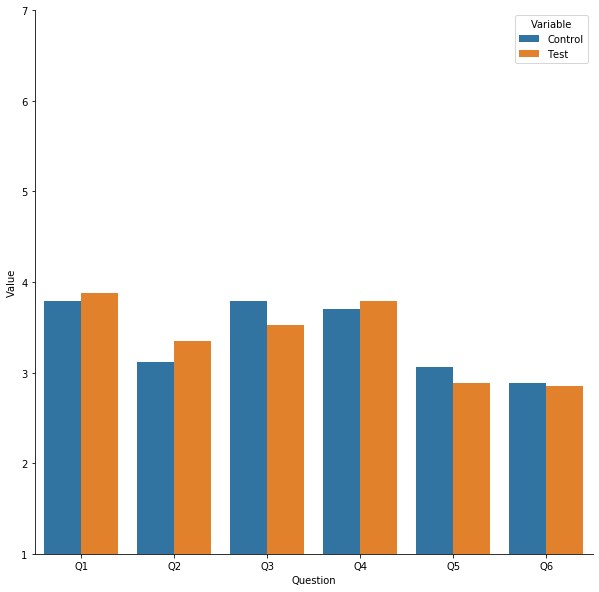

In [23]:
means = pd.DataFrame([["Q1", control.iloc[:, 0].mean(), test.iloc[:, 0].mean()],["Q2", control.iloc[:, 1].mean(), test.iloc[:, 1].mean()],["Q3", control.iloc[:, 2].mean(), test.iloc[:, 2].mean()],["Q4", control.iloc[:, 3].mean(), test.iloc[:, 3].mean()],["Q5", control.iloc[:, 4].mean(), test.iloc[:, 4].mean()],["Q6", control.iloc[:, 5].mean(), test.iloc[:, 5].mean()]], columns = ["Question", "Control", "Test"])

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = means.melt(id_vars='Question').rename(columns=str.title)
sns.barplot(x='Question', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
plt.ylim(bottom = 1,top = 7)

### Boxplot

(1, 7)

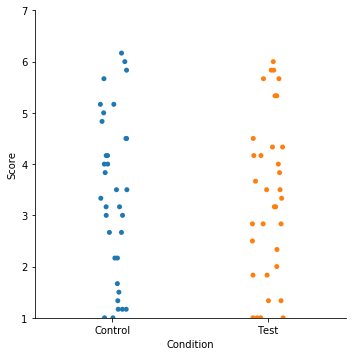

In [24]:
sns.catplot(x = 'Condition', y = "Score", kind = "strip", data = cleanDataControl)
plt.ylim(bottom = 1,top = 7)

When reporting the Wilcoxon test results only the statistic and its significance (p-value) should be reported. (Together with median?)

For example: Presence for the Control group (Median = sth) was lower than for the Test group (Median = sth else) T(statistic) = this, p = that